## __Preparing and Shaping Data__

- In this topic, we will discuss how to prepare the data and ensure its shape.

- Let's start by importing the required libraries.

## Step 1: Import Required Libraries

- Import pandas and NumPy libraries


In [1]:
import pandas as pd
import numpy as np

## Step 2: Load the Dataset

- Load the **titanic** dataset and display the first few rows
- Return a description of the dataset using the describe() method


In [2]:
df = pd.read_csv('../../Datasets/titanic.csv', sep= ',')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Observation:__

- Here, we have **Pclass**, **Name**, **Sex**, **Age**, **SibSp**(sibling and spouse), **Parch**(parent and child), **Ticket**.

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Observations:__

- Here, the mean and median are not applicable for **PassengerId**.
- 29 is the mean age, and 80 is the maximum age.
- Similarly, 32 is the mean, and 512 is the max for **Fare**.

- Now, let's look into the data types using **df.info** or dtypes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


__Observation:__
- Here, both non-null counts,
as well as the data type, is printed.




In [6]:
# Extract category type columns
category_columns = df.select_dtypes(include='object').columns
category_columns = category_columns.drop('Name')
category_columns = category_columns.drop('Ticket')



In [7]:
# Display category type columns
print("\nCategory Type Columns:")
print(category_columns)

# Get unique categories for each column
category_values = {}
for col in category_columns:
    category_values[col] = df[col].unique()

# Display unique categories for each column
for col, values in category_values.items():
    print(f"Unique categories for column '{col}':")
    print(values)


Category Type Columns:
Index(['Sex', 'Cabin', 'Embarked'], dtype='object')
Unique categories for column 'Sex':
['male' 'female']
Unique categories for column 'Cabin':
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D3

## Step 3: Data Preprocessing

- Let's club siblings with spouse,
and parent with child ticket together.
- Create a variable called **Travelalone** for people who are traveling alone
- Create a variable and then add it
- If it is greater than zero,
then they are not traveling alone.
- However, if it is less than zero,
then they are traveling alone.


In [8]:
df['Travelalone'] =  np.where((df['SibSp'] + df['Parch']) > 0, 0 , 1).astype('uint8')

**Observation:**
- Now that
a **Travelalone** attribute is created, let's drop the unnecessary data columns and check if there are any missing values.

In [9]:
df1 = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis =1)

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Travelalone      0
dtype: int64

__Observation:__

- As we can see, there are missing values
in age and cabin.

- Let’s check in **df1** since we have deleted cabin.

In [11]:
df1.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
Travelalone      0
dtype: int64

__Observation:__
- There are missing values in age, so let's replace them.



In [12]:
# See the rows which have missing values
na_values = df1[df1["Age"].isna()]

print("Age NA Values:")
print(na_values)

Age NA Values:
     Survived  Pclass     Sex  Age     Fare Embarked  Travelalone
5           0       3    male  NaN   8.4583        Q            1
17          1       2    male  NaN  13.0000        S            1
19          1       3  female  NaN   7.2250        C            1
26          0       3    male  NaN   7.2250        C            1
28          1       3  female  NaN   7.8792        Q            1
..        ...     ...     ...  ...      ...      ...          ...
859         0       3    male  NaN   7.2292        C            1
863         0       3  female  NaN  69.5500        S            0
868         0       3    male  NaN   9.5000        S            1
878         0       3    male  NaN   7.8958        S            1
888         0       3  female  NaN  23.4500        S            0

[177 rows x 7 columns]


In [13]:
# See the rows which have missing values
na_values = df1[df1["Embarked"].isna()]

print("Embarked NA Values:")
print(na_values)


Embarked NA Values:
     Survived  Pclass     Sex   Age  Fare Embarked  Travelalone
61          1       1  female  38.0  80.0      NaN            1
829         1       1  female  62.0  80.0      NaN            1


In [14]:
df1['Age'].fillna(df1['Age'].median(skipna=True), inplace=True)

embarked_mode = df1['Embarked'].mode().iloc[0]
df1['Embarked'].fillna(embarked_mode, inplace=True)
embarked_mode

'S'

In [15]:
# See the rows which have missing values
na_values = df1[df1["Embarked"].isna()]

print("NA Values:")
print(na_values)

NA Values:
Empty DataFrame
Columns: [Survived, Pclass, Sex, Age, Fare, Embarked, Travelalone]
Index: []


In [16]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travelalone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


__Observation:__

- There are categorical variables like **Sex** and **Embarked**.


### We perform One-Hot encoding

In [17]:
df_titantic = pd.get_dummies(df1, columns= ['Pclass', 'Embarked', 'Sex'],drop_first= True)

In [18]:
df_titantic.head()

,Survived,Age,Fare,Travelalone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,False,True,False,True,True
1,1,38.0,71.2833,0,False,False,False,False,False
2,1,26.0,7.9250,1,False,True,False,True,False
3,1,35.0,53.1000,0,False,False,False,True,False
4,0,35.0,8.0500,1,False,True,False,True,True


__Observation:__

- Hence, the dummy values are created.

## Step 4: Prepare Features and Target Variables

- Let’s try to preprocess the data and create a scaler to standardize the data points

- Create x and y values for the same

In [19]:
X = df_titantic.drop(['Survived'], axis =1)
y = df_titantic['Survived']

- Now, let's import the **MinMaxScaler** and **StandardScaler**.

- Then, transpose that and call it as **MM** or **MinMaxScaler**.

- Finally, transfer and print the data.

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [21]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

### We convert the values to range from 0 to 1 (Normalization)

In [22]:
df_MM = trans_MM.fit_transform(X)
dd1 = pd.DataFrame(df_MM)
dd1

,0,1,2,3,4,5,6,7
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,1.0,1.0,0.0,0.0,1.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,0.0,1.0,0.0
888,0.346569,0.045771,0.0,0.0,1.0,0.0,1.0,0.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

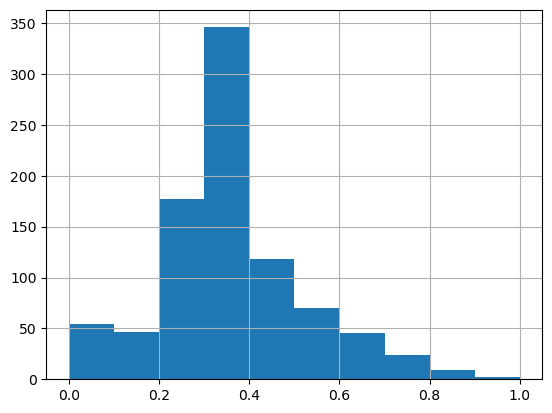

In [23]:
dd1[0].hist()

__Observations:__

- For **Age** and **Fare** in MinScaler, the values have changed from 0 to 1.

- Some of the attributes are also in the range of 0 to 1.

- MinMaxScaler will be using the X values. For example: one value is equal to X minus Xmin divided by Xmax by Xmin.                                                           


- For StandardScaler, we take the origin
minus the mean of the distribution divided by the standard deviation
of the distribution.

- Now, let's check the same for StandardScaler and see how the data varies.

### We convert the data to standard distribution

In [24]:
df_SS = trans_SS.fit_transform(X)
dd1 = pd.DataFrame(df_SS)
dd1


,0,1,2,3,4,5,6,7
0,-0.565736,-0.502445,-1.231645,-0.510152,0.902587,-0.307562,0.615838,0.737695
1,0.663861,0.786845,-1.231645,-0.510152,-1.107926,-0.307562,-1.623803,-1.355574
2,-0.258337,-0.488854,0.811922,-0.510152,0.902587,-0.307562,0.615838,-1.355574
3,0.433312,0.420730,-1.231645,-0.510152,-1.107926,-0.307562,0.615838,-1.355574
4,0.433312,-0.486337,0.811922,-0.510152,0.902587,-0.307562,0.615838,0.737695
...,...,...,...,...,...,...,...,...
886,-0.181487,-0.386671,0.811922,1.960202,-1.107926,-0.307562,0.615838,0.737695
887,-0.796286,-0.044381,0.811922,-0.510152,-1.107926,-0.307562,0.615838,-1.355574
888,-0.104637,-0.176263,-1.231645,-0.510152,0.902587,-0.307562,0.615838,-1.355574
889,-0.258337,-0.044381,0.811922,-0.510152,-1.107926,-0.307562,-1.623803,0.737695


<AxesSubplot:>

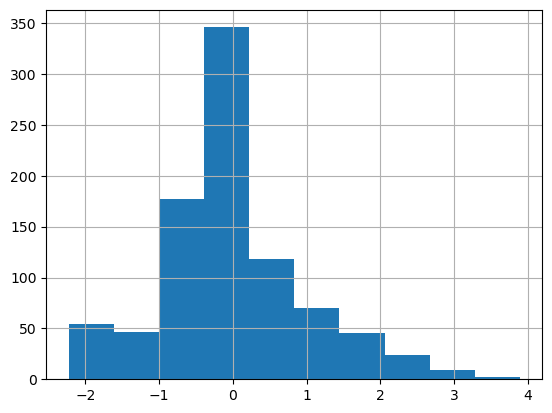

In [25]:
dd1[0].hist()

__Observations:__

- As you can see,
the data has negative values too, and it converted the dummies
we created.

- It always depends on the case whether you want to consider
MinMaxScalar or Standardscalar.

So, this is how you prepare the data, cleanse the data, and, if required,
preprocess the data.
